#  MACHINE LEARNING MINI PROJECT OF YEAR : 2020

-----

- ### __TOPIC :__ NOVAL CORONA VIRUS PREDICTION


- ### __ABOUT PROJECT :__
#### - In This Project We Analyze the Outbreak of Corona Virus across the different regions of the world .
#### - Predict the Number of Upcoming Cases for the Next 10 Days .
#### - Using the Linear Regression & SVM Model .

-------

### __- Importing Necessary Libraries :__

In [72]:
# FOR NUMERICAL COMPTATION AND MANIPULATION
import pandas as pd
import matplotlib.pyplot as plt
# FOR VISUALISING THE DATA AND THE MODEL  
import matplotlib.colors as mcolors
import numpy as np
# FOR STATISTICAL GRAPHICS
import seaborn as sns
import plotly as px 
import math 
import time 
import random
#FOR HANDLING THE WARNINGS
import warnings

from sklearn.model_selection import RandomizedSearchCV , train_test_split
from sklearn.svm import SVR
# FOR  METRIC COMPUTUTION
from sklearn.metrics import mean_squared_error,mean_absolute_error
# FOR WORKING WITH DATE AND TIME
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline



### __- Reading All 3 Datasets :__

##### 1 . Confirmed Covid 19 Cases : 

In [73]:
confirmed_cases = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')

##### 2 . Covid 19 Deaths Cases :

In [74]:
deaths_reported = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')

##### 3 . Covid 19 Recovered Cases :

In [75]:
recovered_cases = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')

### __- Displaying Top 5 Rows of each Datasets :__

##### 1 . For Covid 19 Confirmed Cases : 

In [76]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,782
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,30


##### 2 . For Covid 19 Death Cases :

In [77]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,68
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,453
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,43
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


##### 3 . For Covid 19 Recovered Cases :

In [78]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,166,179,188,188,207,220,228,252,260,310
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,356,385,394,403,410,422,431,455,470,488
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,309,333,344,344,344,385,398,423,468,468
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,7,7,11


### __- Extracting All the Columns Using the Keys() Function :__

In [79]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20',
       '4/28/20', '4/29/20', '4/30/20', '5/1/20'],
      dtype='object', length=105)

### __- Extracting Only the Dates Columns of each 3 Cases :__

In [80]:
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]
deaths = deaths_reported.loc[:,cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:,cols[4]:cols[-1]]

### __- Top 5 Rows of Outbreak Cases :__

In [81]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
1,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,782
2,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
3,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,745
4,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,30


In [82]:
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,68
1,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,31
2,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,453
3,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,43
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [83]:
recoveries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,0,0,0,0,0,0,0,0,0,0,...,166,179,188,188,207,220,228,252,260,310
1,0,0,0,0,0,0,0,0,0,0,...,356,385,394,403,410,422,431,455,470,488
2,0,0,0,0,0,0,0,0,0,0,...,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821
3,0,0,0,0,0,0,0,0,0,0,...,309,333,344,344,344,385,398,423,468,468
4,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,7,7,11


### __- Finding Total Confirmed , Deaths & Recovered Cases :__
### __- Appending them into 4 Empty Lists :__
### __- Calculating , Total Mortality Rate = Death_Sum / Confirmed Cases :__

In [84]:
dates=confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recoverd=[]
for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recoverd.append(recovered_sum)

### __- Displaying each Newly Created Variables :__

In [85]:
confirmed_sum

3343777

In [86]:
death_sum

238650

In [87]:
recovered_sum

1053327

In [88]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145219,
 156116,
 167466,
 181603,
 197113,
 214846,
 242616,
 272247,
 304555,
 337018,
 378282,
 418079,
 467723,
 529701,
 593423,
 660824,
 720285,
 782490,
 857608,
 932638,
 1013458,
 1095876,
 1176059,
 1249737,
 1321427,
 1396438,
 1480200,
 1565538,
 1657929,
 1736025,
 1835164,
 1905192,
 1975581,
 2055506,
 2151872,
 2239723,
 2317339,
 2400894,
 2471847,
 2549175,
 2624741,
 2708547,
 2795875,
 2881140,
 2955033,
 3023722,
 3097190,
 3172287,
 3256853,
 3343777]

### __- Convert all Dates & Cases in Numpy Array Form :__

In [89]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recoverd).reshape(-1,1)

In [90]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [91]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3347],
       [  3459],
       [  3558],
       [  3801],
       [  3987],
       [  4263],
       [  4614],
       [  4722],
       [  5408],
       [  5830],
       [  6472],
       [  7150],
       [  7956],
       [  8823],
       [  9946],
       [ 11422

In [92]:
total_recovered

array([[     28],
       [     30],
       [     36],
       [     39],
       [     52],
       [     61],
       [    107],
       [    126],
       [    143],
       [    222],
       [    284],
       [    472],
       [    623],
       [    852],
       [   1124],
       [   1487],
       [   2011],
       [   2616],
       [   3244],
       [   3946],
       [   4683],
       [   5150],
       [   6295],
       [   8058],
       [   9395],
       [  10865],
       [  12583],
       [  14352],
       [  16121],
       [  18177],
       [  18890],
       [  22886],
       [  23394],
       [  25227],
       [  27905],
       [  30384],
       [  33277],
       [  36711],
       [  39782],
       [  42716],
       [  45602],
       [  48228],
       [  51170],
       [  53796],
       [  55865],
       [  58358],
       [  60694],
       [  62494],
       [  64404],
       [  67003],
       [  68324],
       [  70251],
       [  72624],
       [  76034],
       [  78088],
       [  

### __- Future Forecasting for the Next 10 Days :__

In [93]:
days_in_future=10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [94]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

### __- Converting All Integers into Datetime for Better Visualiztion :__

In [95]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

### __- Visualization within the Latest Data 15 of March :__

In [96]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]
 

In [97]:
latest_confirmed

0       2335
1        782
2       4154
3        745
4         30
5         25
6       4532
7       2148
8        106
9       3030
10        27
11      1034
12       438
13       221
14      1371
15       551
16     15531
17      1854
18        81
19      3170
20      8238
21        81
22     14917
23     49032
24        90
25         7
26      1229
27      1781
28     92202
29       138
       ...  
236       24
237       18
238        0
239       19
240       63
241      353
242      257
243      508
244       15
245        5
246       11
247      806
248      151
249        3
250        6
251       12
252        9
253       23
254       11
255      136
256        6
257       37
258       13
259        1
260       45
261        6
262       16
263        7
264        1
265       15
Name: 5/1/20, Length: 266, dtype: int64

In [98]:
latest_deaths

0        68
1        31
2       453
3        43
4         2
5         3
6       225
7        33
8         3
9        41
10        0
11        6
12        4
13       13
14       18
15        8
16      589
17       25
18       11
19        8
20      170
21        7
22       93
23     7703
24        2
25        0
26       66
27       70
28     6412
29        1
       ... 
236       0
237       2
238       0
239       0
240       3
241       2
242       1
243      26
244       0
245       0
246       0
247      22
248       6
249       0
250       1
251       1
252       2
253       1
254       1
255       7
256       0
257       3
258       0
259       0
260       0
261       0
262       1
263       2
264       0
265       0
Name: 5/1/20, Length: 266, dtype: int64

In [99]:
latest_recoveries

0         310
1         488
2        1821
3         468
4          11
5          15
6        1292
7         977
8         103
9        2293
10         24
11        965
12        422
13        157
14       1300
15        511
16      13110
17       1365
18         24
19       1555
20        174
21         39
22       2918
23      11892
24         13
25         42
26          5
27        134
28        755
29      38039
        ...  
222         2
223         0
224       435
225    164015
226      1212
227       148
228       219
229        74
230         5
231        76
232         8
233       271
234        31
235         3
236         3
237         5
238         0
239         8
240         4
241        21
242         0
243         9
244        13
245         0
246         0
247         5
248         4
249         1
250         0
251         0
Name: 5/1/20, Length: 252, dtype: int64

### __- Find the List of Unique Countries :__

In [100]:
unique_countries = list(confirmed_cases['Country/Region'].unique())

In [101]:
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

### __- Total Number of Confirmed Cases by each Country :__

In [102]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries :
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)
    
    
unique_countries = [ k for k , v in sorted(zip(unique_countries,country_confirmed_cases),key = operator.itemgetter(1),reverse=1)]

for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

### __- Number of Cases per Country / Regions :__

In [103]:
print('CONFIRMED CASES ORDER BY COUNTRIES / REGIONS :')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]}cases')

CONFIRMED CASES ORDER BY COUNTRIES / REGIONS :
US:1103461cases
Spain:213435cases
Italy:207428cases
United Kingdom:178685cases
France:167305cases
Germany:164077cases
Turkey:122392cases
Russia:114431cases
Iran:95646cases
Brazil:92202cases
China:83959cases
Canada:56343cases
Belgium:49032cases
Peru:40459cases
Netherlands:39989cases
India:37257cases
Switzerland:29705cases
Ecuador:26336cases
Portugal:25351cases
Saudi Arabia:24097cases
Sweden:21520cases
Ireland:20833cases
Mexico:20739cases
Pakistan:18114cases
Singapore:17101cases
Chile:17008cases
Israel:16101cases
Austria:15531cases
Belarus:14917cases
Japan:14305cases
Qatar:14096cases
Poland:13105cases
United Arab Emirates:13038cases
Romania:12567cases
Ukraine:10861cases
Korea, South:10780cases
Indonesia:10551cases
Denmark:9509cases
Serbia:9009cases
Philippines:8772cases
Bangladesh:8238cases
Norway:7783cases
Czechia:7737cases
Dominican Republic:7288cases
Colombia:7006cases
Australia:6778cases
Panama:6720cases
Malaysia:6071cases
South Africa:5

### __- Finding List of Unique Provinces :__

In [104]:
unique_provinces = list(confirmed_cases['Province/State'].unique())

In [105]:
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Saint Barthelemy',
 'St Martin',
 'Martinique',
 'Aruba',
 'Curacao',
 'Sint Maarten',
 'Bermuda',
 'Cayman Island

In [106]:
outliers = ['Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Saint Barthelemy',
 'St Martin',
 'Martinique',
 'Aruba',
 'Curacao',
 'Sint Maarten',
 'Bermuda',
 'Cayman Islands',
 'Channel Islands',
 'Gibraltar',
 'Isle of Man',
 'Montserrat',
 'Diamond Princess',
 'Recovered',
 'Northwest Territories',
 'Yukon',
 'Anguilla',
 'British Virgin Islands',
 'Turks and Caicos Islands',
 'Bonaire, Sint Eustatius and Saba',
 'Falkland Islands (Malvinas)',
 'Saint Pierre and Miquelon']


In [107]:
for i in outliers:
    unique_provinces.remove(i)

### __- Finding Number of Confirmed Cases per Provinces , State or City :__

In [108]:
province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)

### __- Number of Cases per Province , State or City :__

In [109]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}:{province_confirmed_cases[i]} cases')

### __- Handling nan values if any of them exist :__

In [110]:
nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
        
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)
        

### __- Bar Graph for Total Confirmed Cases across different Countries :__

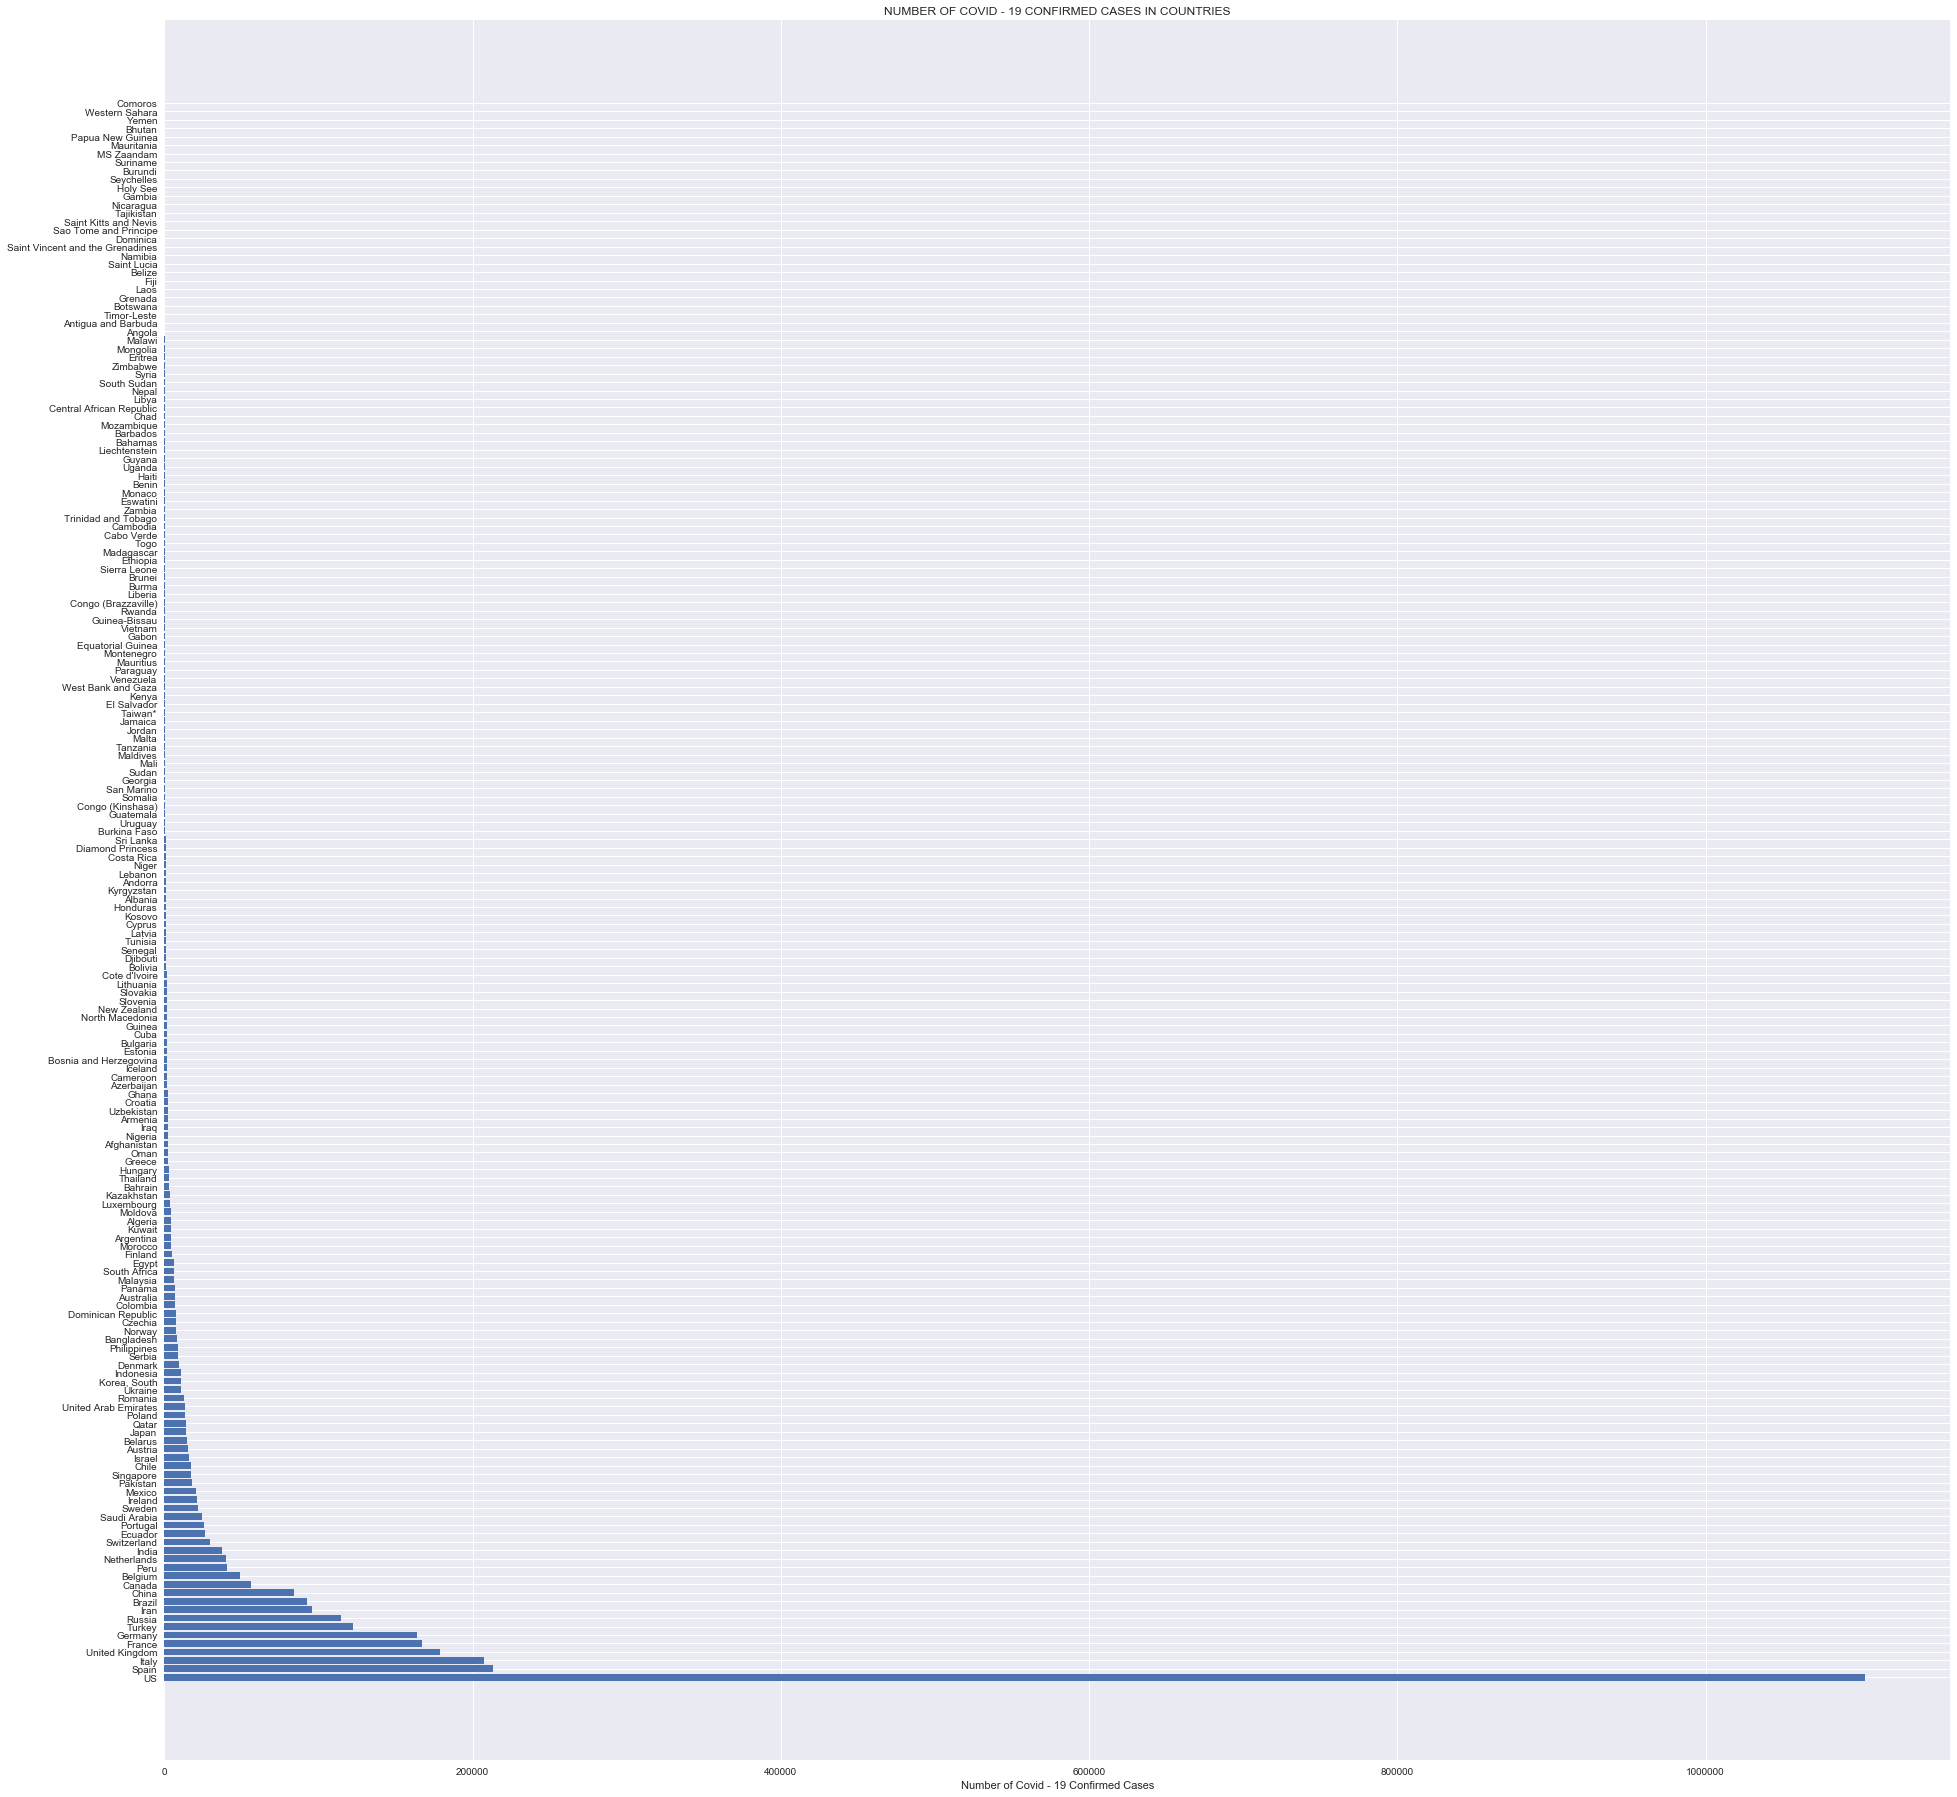

In [111]:
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('NUMBER OF COVID - 19 CONFIRMED CASES IN COUNTRIES')
plt.xlabel('Number of Covid - 19 Confirmed Cases')
plt.show()

### __- Bar Graph for Total Confirmed Cases between Mainland & Outside the Mainland China :__

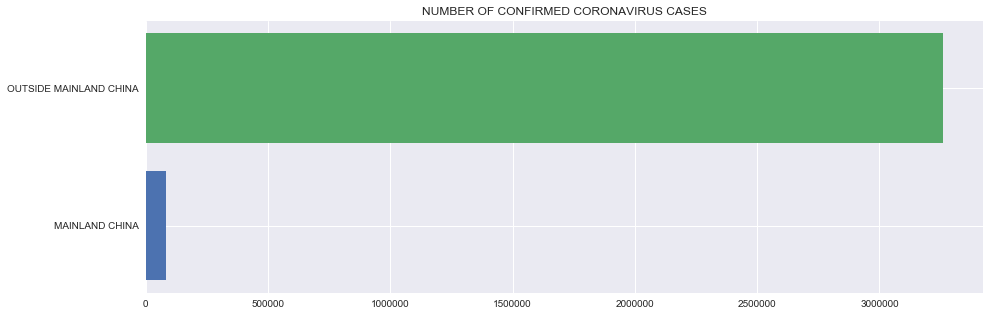

In [112]:
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(15,5))
plt.barh('MAINLAND CHINA',china_confirmed)
plt.barh('OUTSIDE MAINLAND CHINA',outside_mainland_china_confirmed)
plt.title('NUMBER OF CONFIRMED CORONAVIRUS CASES')
plt.show()

### __- Total Number of Cases in Mainland china & Outside of it :__

In [113]:
print('OUTSIDE MAINLAND CHINA CASES : {} '.format(outside_mainland_china_confirmed))
print('MAINLAND CHINA CASES : {} '.format(china_confirmed))
print('TOTAL CASES : {} '.format(china_confirmed+outside_mainland_china_confirmed))

OUTSIDE MAINLAND CHINA CASES : 3259818 
MAINLAND CHINA CASES : 83959 
TOTAL CASES : 3343777 


### __- Here 10 Countries have Confirmed Cases & rest all comes in others Category :__

In [114]:
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[:10])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append('others')
    visual_confirmed_cases.append(others)

### __- Training & Testing the Confirmed Cases :__

In [115]:
x_train_confirmed,x_test_confirmed,y_train_confirmed,y_test_confirmed = train_test_split(days_since_1_22,world_cases,test_size=0.25,shuffle=False)

### __- Constructing the SVM Model :__

In [116]:
svm =  SVR()

In [117]:
kernel = ['poly','sigmoid','rbf']

In [118]:
c = [ 0.01 , 0.1 , 1 , 10 ]

In [119]:
gamma = [ 0.01 , 0.1 , 1 ]

In [120]:
epsilon = [ 0.01 , 0.1 , 1 ]

In [121]:
shrinking = [ True , False ]

In [122]:
svm_grid= {'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

In [123]:
svm_search = RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)


In [124]:
svm_search.fit(x_train_confirmed,y_train_confirmed.ravel())

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   55.5s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=40, n_jobs=-1,
          param_distributions={'kernel': ['poly', 'sigmoid', 'rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1], 'shrinking': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [125]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 1, 'C': 10}

In [126]:
svm_confirmed = svm_search.best_estimator_

In [127]:
svm_pred = svm_confirmed.predict(future_forecast)

In [128]:
svm_pred

array([   5438.26297666,    5440.21225815,    5453.85722865,
          5490.89357711,    5563.01699258,    5681.92316438,
          5859.30778028,    6106.86653043,    6436.29510404,
          6859.28919126,    7387.54447843,    8032.75665189,
          8806.62140561,    9720.83443357,   10787.09140683,
         12017.08803464,   13422.5199957 ,   15015.08298398,
         16806.47269345,   18808.38477231,   21032.51499082,
         23490.55893613,   26194.21237851,   29155.17099668,
         32385.1304083 ,   35895.78641416,   39698.83463193,
         43805.9708624 ,   48228.89041806,   52979.28958798,
         58068.86344052,   63509.3080206 ,   69312.319129  ,
         75489.59207822,   82052.82303525,   89013.70731259,
         96383.94071103,  104175.2187872 ,  112399.23734189,
        121067.69217587,  130192.27908994,  139784.69339658,
        149856.63065244,  160419.78690244,  171485.8581915 ,
        183066.53934384,  195173.52713681,  207818.51639462,
        221013.20242978,

### __- Checking aganist Testing Data :__

MEAN ABSOLUTE ERROR : 1002952.0987270698
MEAN SQUARED ERROR : 1079224348330.2651


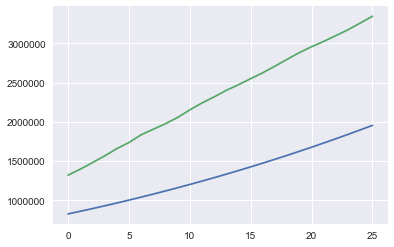

In [129]:
svm_test_pred = svm_confirmed.predict(x_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MEAN ABSOLUTE ERROR :',mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MEAN SQUARED ERROR :',mean_squared_error(svm_test_pred,y_test_confirmed))

### __- Total Number of Covid 19 Cases over the Time :__

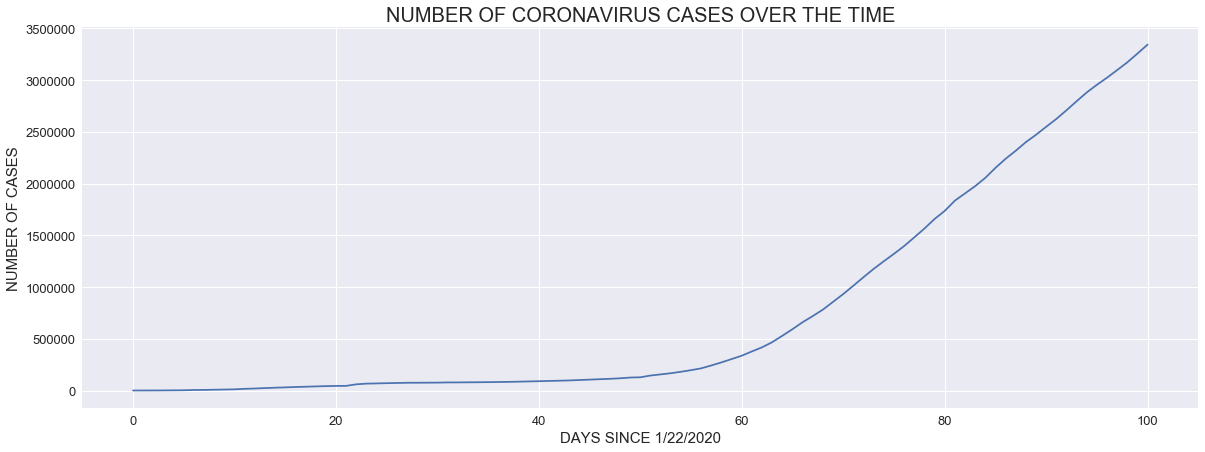

In [130]:
plt.figure(figsize=(20,7))
plt.plot(adjusted_dates,world_cases)
plt.title('NUMBER OF CORONAVIRUS CASES OVER THE TIME',size=20)
plt.xlabel('DAYS SINCE 1/22/2020',size=15)
plt.ylabel('NUMBER OF CASES',size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

### __- Confirmed Cases   VS   Predicted Cases :__

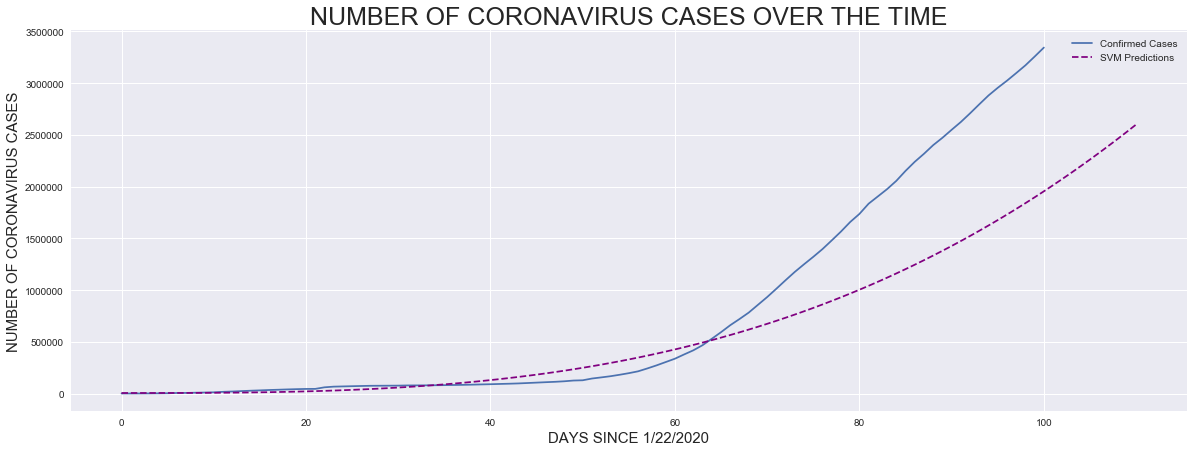

In [131]:
plt.figure(figsize=(20,7))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='purple')
plt.title('NUMBER OF CORONAVIRUS CASES OVER THE TIME',size=25)
plt.xlabel('DAYS SINCE 1/22/2020',size=15)
plt.ylabel('NUMBER OF CORONAVIRUS CASES',size=15)
plt.legend(['Confirmed Cases','SVM Predictions'])

### __- Covid 19 Predictions for the Next 10 Days using SVM :__

In [132]:
print('SVM FUTURE PREDICTIONS')
set(zip(future_forecast_dates[-10:],svm_pred[-10:]))

SVM FUTURE PREDICTIONS


{('05/02/2020', 2013784.938757906),
 ('05/03/2020', 2074031.387976656),
 ('05/04/2020', 2135470.790320406),
 ('05/05/2020', 2198114.848914156),
 ('05/06/2020', 2261975.262976656),
 ('05/07/2020', 2327063.716101656),
 ('05/08/2020', 2393391.919226656),
 ('05/09/2020', 2460971.567664156),
 ('05/10/2020', 2529814.333289156),
 ('05/11/2020', 2599931.942664156)}

### __- Making Predictions Using Linear Regression Model :__

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
linear_model = LinearRegression(normalize=True,fit_intercept=True)
linear_model.fit(x_train_confirmed,y_train_confirmed)
test_linear_pred = linear_model.predict(x_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MEAN ABSOLUTE ERROR :',mean_absolute_error(test_linear_pred,y_test_confirmed))
print('MEAN SQUARED ERROR :',mean_squared_error(test_linear_pred,y_test_confirmed))

MEAN ABSOLUTE ERROR : 1578843.6578688407
MEAN SQUARED ERROR : 2767507490725.6846


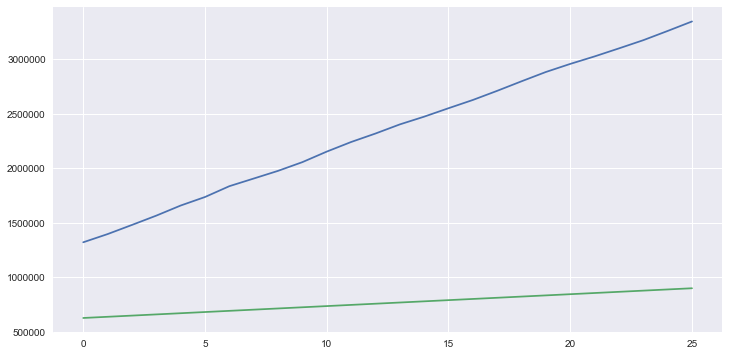

In [135]:
plt.figure(figsize=(12,6))
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

### __- Number of Cases over the Time :__

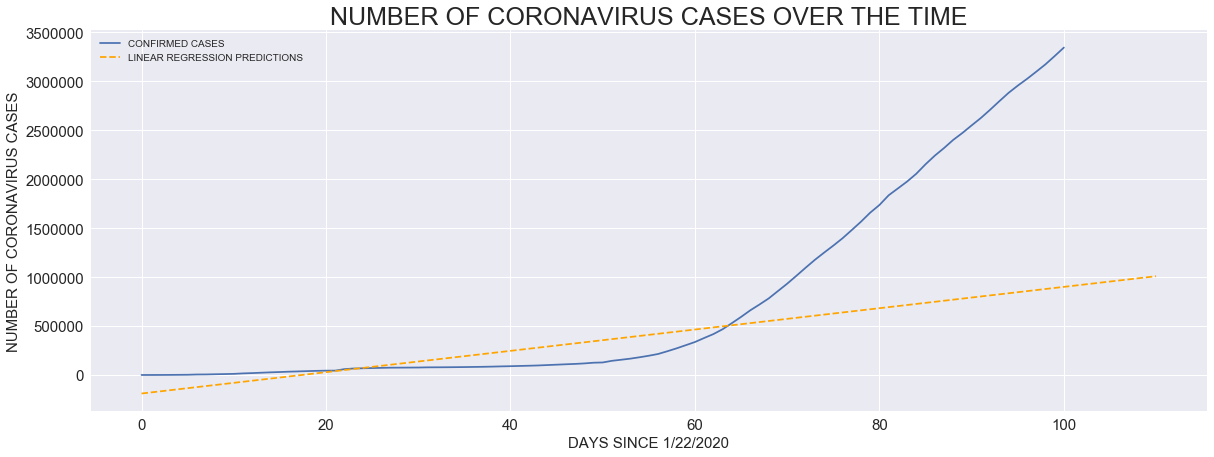

In [136]:
plt.figure(figsize=(20,7))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,linear_pred,linestyle='dashed',color='orange')
plt.title('NUMBER OF CORONAVIRUS CASES OVER THE TIME',size=25)
plt.xlabel('DAYS SINCE 1/22/2020',size=15)
plt.ylabel('NUMBER OF CORONAVIRUS CASES',size=15)
plt.legend(['CONFIRMED CASES','LINEAR REGRESSION PREDICTIONS'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

### __- Predictions for the Next 10 Days Using Linear Regression :__

In [137]:
print('LINEAR REGRESSION FUTURE PREDICTIONS')
print(linear_pred[-10:])

LINEAR REGRESSION FUTURE PREDICTIONS
[[ 911192.74609768]
 [ 922081.43983879]
 [ 932970.1335799 ]
 [ 943858.827321  ]
 [ 954747.52106211]
 [ 965636.21480322]
 [ 976524.90854433]
 [ 987413.60228544]
 [ 998302.29602655]
 [1009190.98976766]]


### __- Total Deaths over the Time :__

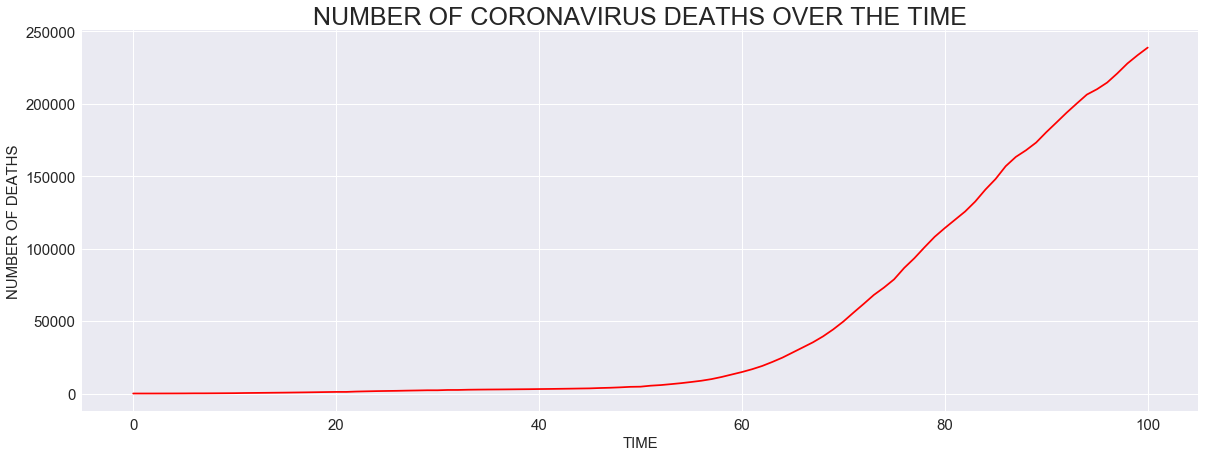

In [138]:


plt.figure(figsize=(20,7))
plt.plot(adjusted_dates,total_deaths,color='red')
plt.title('NUMBER OF CORONAVIRUS DEATHS OVER THE TIME',size=25)
plt.xlabel('TIME',size=15)
plt.ylabel('NUMBER OF DEATHS',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

### __- Mortality Rate of Corona Virus over the Time :__ 

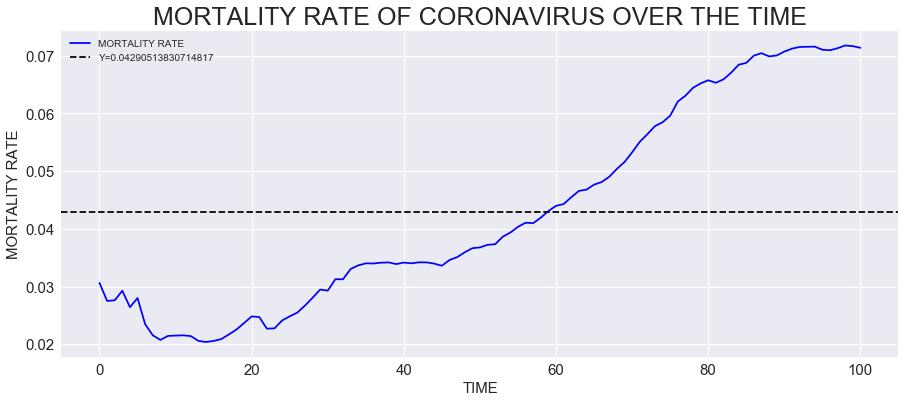

In [139]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(15,6))


plt.plot(adjusted_dates,mortality_rate,color='blue')

plt.axhline(y=mean_mortality_rate,linestyle='--',color='black')

plt.title('MORTALITY RATE OF CORONAVIRUS OVER THE TIME',size=25)
plt.xlabel('TIME',size=15)
plt.ylabel('MORTALITY RATE',size=15)
plt.legend(['MORTALITY RATE','Y='+str(mean_mortality_rate)])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


### __- Total Number Of Covid 19 Recovered Cases over the Time :__

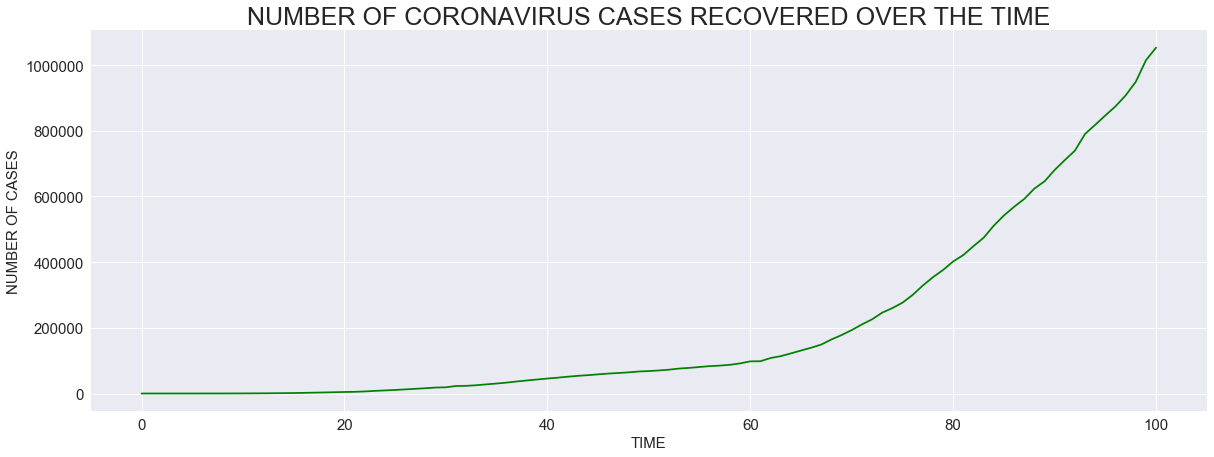

In [140]:
plt.figure(figsize=(20,7))
plt.plot(adjusted_dates,total_recovered,color='green')
plt.title('NUMBER OF CORONAVIRUS CASES RECOVERED OVER THE TIME',size=25)
plt.xlabel('TIME',size=15)
plt.ylabel('NUMBER OF CASES',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

### __- Recovered Cases  VS  Death cases :__ 

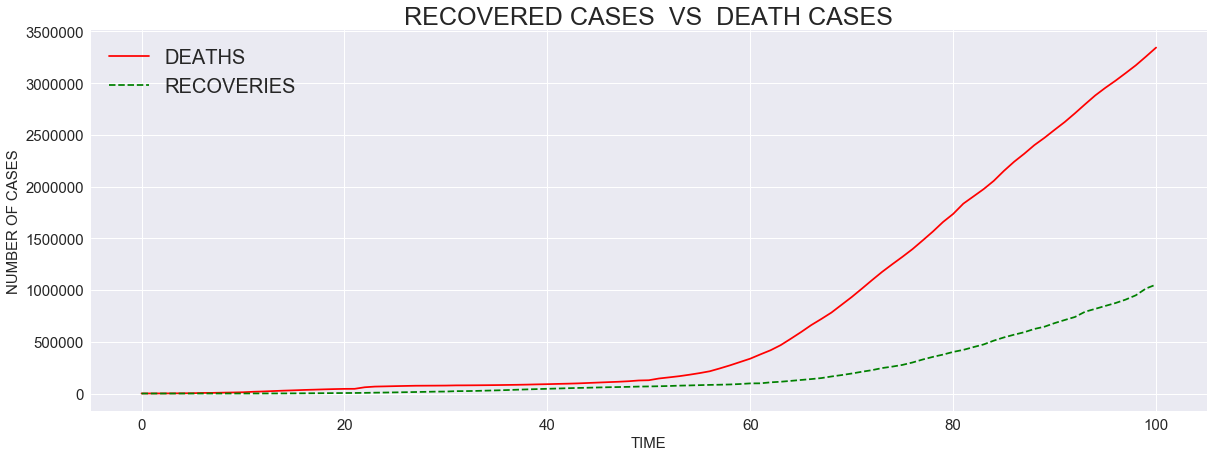

In [141]:
plt.figure(figsize=(20,7))
plt.plot(adjusted_dates,world_cases,color='red')
plt.plot(adjusted_dates,total_recovered,linestyle='dashed',color='green')
plt.title('RECOVERED CASES  VS  DEATH CASES',size=25)
plt.xlabel('TIME',size=15)
plt.ylabel('NUMBER OF CASES',size=15)
plt.legend(['DEATHS','RECOVERIES'],loc='best',fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

### __- Covid 19 Deaths  VS  Covid 19 Recoveries :__

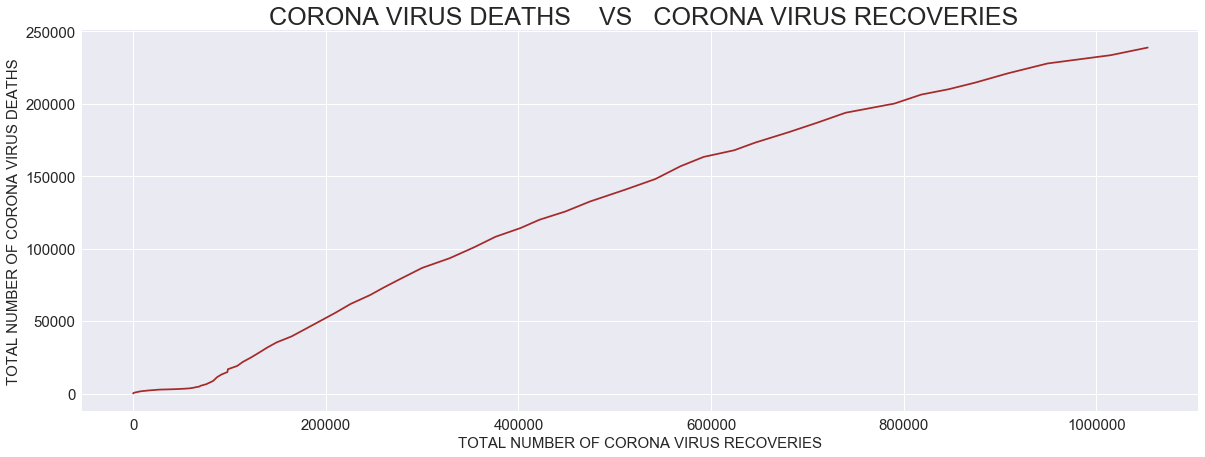

In [142]:
plt.figure(figsize=(20,7))
plt.plot(total_recovered,total_deaths,color='brown')
plt.title('   CORONA VIRUS DEATHS    VS   CORONA VIRUS RECOVERIES  ',size=25) 
plt.xlabel('TOTAL NUMBER OF CORONA VIRUS RECOVERIES',size=15)
plt.ylabel('TOTAL NUMBER OF CORONA VIRUS DEATHS',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

- ## __THE END__

--------